## Define history kernel using exponential basis

 epoch 799 of 800 || loss 7003.1123

Text(0, 0.5, 'negative log-likelihood')

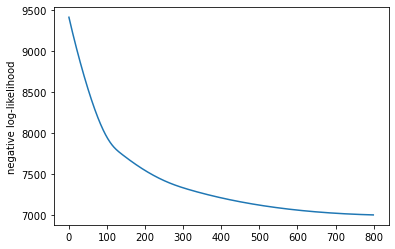

In [1]:
import matplotlib.pyplot as plt
import torch

from kernel.base import Kernel
from mmdglm.glm.base import GLM


# Load data
data = torch.load('./data/synthetic_data.pt')

# Define basis with a single exponential
dt = 1
support_range = torch.arange(0, 100, dt).unsqueeze(1)
tau = torch.tensor([10.]).unsqueeze(0)
basis = torch.exp(-support_range / tau)

# Define Kernels and GLM
stim_kernel = Kernel(basis=basis)
hist_kernel = Kernel(basis=basis)
glm = GLM(bias=-5., stim_kernel=stim_kernel, hist_kernel=hist_kernel)

# Define optimizer and fit
optim = torch.optim.Adam(glm.parameters(), lr=5e-3, betas=(0, 0.9))
loss, _ = glm.fit(data['t'], data['mask_spikes'], stim=data['stim'], num_epochs=800, optim=optim, verbose=True)

# Plot negative log-likelihood
fig, ax = plt.subplots()
ax.plot(loss)
ax.set_ylabel('negative log-likelihood')

## Display parameters

Bias is  Parameter containing:
tensor([-3.1983], requires_grad=True)


Text(0, 0.5, 'history kernel')

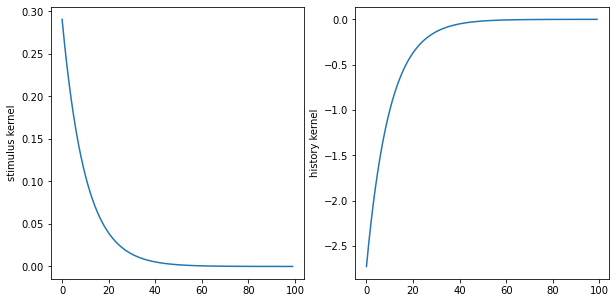

In [2]:
# Display parameters
t_ker = torch.arange(0, 100, 1)

print('Bias is ', glm.bias)
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2)
ax1.plot(t_ker, glm.stim_kernel.evaluate(t_ker).detach())
ax2.plot(t_ker, glm.hist_kernel.evaluate(t_ker).detach())
ax1.set_ylabel('stimulus kernel')
ax2.set_ylabel('history kernel')